In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stimuli = ["faces", "objects"]
conditions = ["0-back", "2-back"]
responses = ["left", "right"]

dimensions = [(x, y, z) for x in stimuli for y in conditions for z in responses]

In [3]:

def generate_matrix(doi):
    "Generate a matrix based on the Dimensions of Interest of a region"
    N = len(dimensions)
    denum = np.sum(doi)
    M = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            acc = 0.0
            e1 = dimensions[i]
            e2 = dimensions[j]
            for d in range(len(doi)):
                if doi[d] == 1:
                    if e1[d] == e2[d]:
                        acc += 1
                        
            M[i,j] = acc/denum
    return M

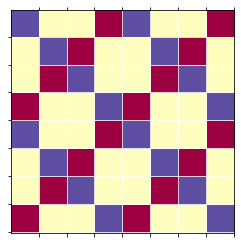

In [4]:
M = generate_matrix((0, 1, 1))
plt.matshow(M, cmap="Spectral", interpolation='none', vmin=0, vmax=1)
plt.xticks(np.arange(0.5,8.5), [])
plt.yticks(np.arange(0.45,8.45), [])
plt.grid(color="white")

In [80]:
ROIs = {"Perception" : (1, 0,  0),
        "WM" : (0, 1, 0),
        "Action" : (0, 0, 1),
        "LTM" : (1, 1, 0),
        "Procedural" : (0, 1, 1),
}

names = ["%s, %s, %s" % (x) for x in dimensions]

Now visualize the predictions

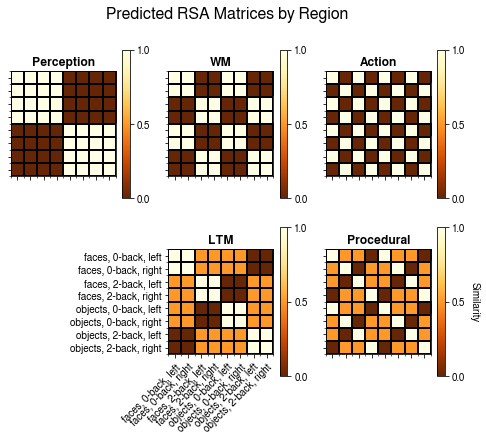

In [96]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(8, 5))
fig.set_size_inches(8, 6)

axes = [ax1, ax2, ax3, ax5, ax6] # ax4 is left out

for j, roi in enumerate(ROIs):
    M = generate_matrix(ROIs[roi]) # + np.random.rand(*M.shape)/5 #Add realistic noise
    ax = axes[j]
    ax.set_title(roi, fontname="FreeSans", fontdict={'weight':'bold'})
    labels = [""] * len(names)
    if ax == ax5:
        labels = names
    im = ax.imshow(M, vmin=-0, vmax=1, cmap="YlOrBr_r")
    
    # Major ticks
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    
    # Minor ticks
    ax.set_xticks(np.arange(-.5, len(names), 1), minor=True)
    ax.set_yticks(np.arange(-.5, len(names), 1), minor=True)

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='k', linestyle='-', linewidth=2)
    
    # Labels
    ax.set_xticklabels(labels, fontname="FreeSans")
    ax.set_yticklabels(labels, fontname="FreeSans")
    
    plt.setp(ax.get_xticklabels(), rotation=45,
             ha="right", rotation_mode="anchor")
    
    
    cbar = ax.figure.colorbar(im, ax=ax, orientation="vertical", ticks=[0, 0.5, 1])
    for l in cbar.ax.yaxis.get_ticklabels():
        l.set_family("FreeSans")
        
    # Create colorbar
    if (ax == ax6):
        cbar.ax.set_ylabel("Similarity", rotation=-90, va="bottom", fontname="FreeSans")

ax4.axis('off')
fig.suptitle("Predicted RSA Matrices by Region", fontname="FreeSans", fontweight='normal', fontsize=16)
fig.savefig("rsa_matrix.png", dpi=200)
plt.show()